# Цифровой фотомонтаж

##Выполнила: Егорова Вера

In [1]:
%matplotlib inline
import cv2
import numpy as np
from matplotlib import pyplot as plt

### Перенос цвета

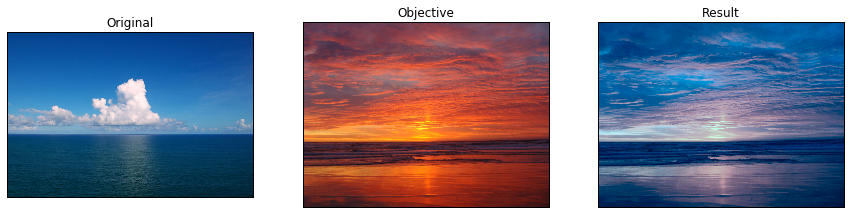

In [2]:
def show_images(original, objective, result):
    plt.figure(figsize=(15, 8)) 
    plt.subplot2grid((1,3), (0,0), colspan=1)    
    plt.title('Original')
    plt.imshow(cv2.cvtColor(original, cv2.COLOR_BGR2RGB))
    plt.xticks([]), plt.yticks([])
    plt.subplot2grid((1,3), (0,1), colspan=1)
    plt.title('Objective')
    plt.imshow(cv2.cvtColor(objective, cv2.COLOR_BGR2RGB))
    plt.xticks([]), plt.yticks([])
    plt.subplot2grid((1,3), (0,2), colspan=1)
    plt.title('Result')
    plt.imshow(cv2.cvtColor(result, cv2.COLOR_BGR2RGB))
    plt.xticks([]), plt.yticks([])
    plt.show()
    
def color_transfer(original, objective):
    orig_l, orig_a, orig_b = cv2.split(cv2.cvtColor(original, cv2.COLOR_BGR2LAB))
    obj_l, obj_a, obj_b = cv2.split(cv2.cvtColor(objective, cv2.COLOR_BGR2LAB))
    
    orig_mean_l, orig_mean_a, orig_mean_b = np.mean(orig_l), np.mean(orig_a), np.mean(orig_b)
    obj_mean_l, obj_mean_a, obj_mean_b = np.mean(obj_l), np.mean(obj_a), np.mean(obj_b)
    
    orig_var_l, orig_var_a, orig_var_b = np.var(orig_l), np.var(orig_a), np.var(orig_b)
    obj_var_l, obj_var_a, obj_var_b = np.var(obj_l), np.var(obj_a), np.var(obj_b)
    
    obj_l, obj_a, obj_b = obj_l - obj_mean_l, obj_a - obj_mean_a, obj_b - obj_mean_b
    obj_l, obj_a, obj_b = obj_l * (orig_var_l/obj_var_l)**.5, obj_a * (orig_var_a/obj_var_a)**.5,  \
                          obj_b * (orig_var_b/obj_var_b)**.5
    
    obj_l, obj_a, obj_b = obj_l + orig_mean_l, obj_a + orig_mean_a, obj_b + orig_mean_b
    
    obj_l[obj_l < 0], obj_a[obj_a < 0], obj_b[obj_b < 0] = 0, 0, 0
    obj_l[obj_l > 255], obj_a[obj_a > 255], obj_b[obj_b > 255] = 255, 255, 255
    
    result = np.array(cv2.merge((obj_l, obj_a, obj_b)), np.uint8)
    result = cv2.cvtColor(result, cv2.COLOR_LAB2BGR)
    show_images(original, objective, result)
    return objective
    

original_image = cv2.imread('ocean_day.jpg')
objective_image = cv2.imread('ocean_sunset.jpg')
result = color_transfer(original_image, objective_image)

### Замена лиц

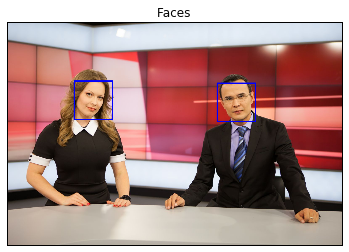

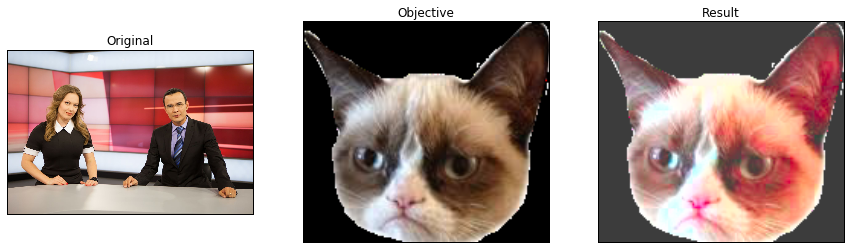

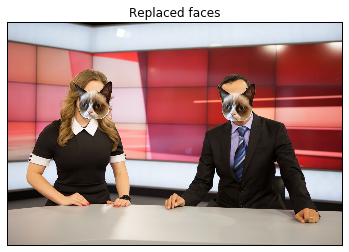

In [68]:
def replace_faces(image_name, cascades_name, scale, neigb):
    news_image = cv2.imread(image_name)
    frontal_cascade = cv2.CascadeClassifier(cascades_name)
    news_image_gray = cv2.cvtColor(news_image, cv2.COLOR_BGR2GRAY)

    faces = frontal_cascade.detectMultiScale(news_image_gray, scale, neigb)
    for (x,y,w,h) in faces:
        cv2.rectangle(news_image,(x,y), (x+w,y+h), (255,0,0), 5)
    plt.imshow(cv2.cvtColor(news_image, cv2.COLOR_BGR2RGB))
    plt.xticks([]), plt.yticks([])
    plt.title('Faces')
    plt.show()
    original_image = cv2.imread(image_name, cv2.IMREAD_UNCHANGED)
    objective_image = cv2.imread('newface.png', cv2.IMREAD_UNCHANGED)
    colored_cat = color_transfer(original_image, objective_image)
    cat_h, cat_w, cat_channels = colored_cat.shape
    for (x,y,w,h) in faces:
        roi_color = original_image[y:y+h, x:x+w]
        resized_cat = np.array(roi_color)
        colored_cat = cv2.resize(colored_cat, (w,h), dst=resized_cat, interpolation = cv2.INTER_CUBIC)
        cat = cv2.resize(objective_image, (w,h), dst=resized_cat, interpolation = cv2.INTER_CUBIC)
        for i in xrange(h):
            for j in xrange(w):
                if cat[i][j][3] != 0:
                    roi_color[i][j] = cat[i][j][:3]

    plt.imshow(cv2.cvtColor(original_image, cv2.COLOR_BGR2RGB))
    plt.xticks([]), plt.yticks([])
    plt.title('Replaced faces')
    plt.show()
    
replace_faces('news_1.jpg', 'haarcascade_frontalface_default.xml', 1.5, 5)

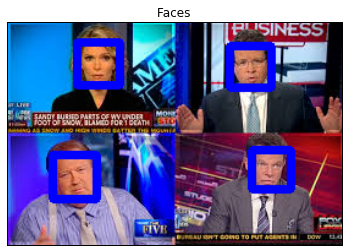

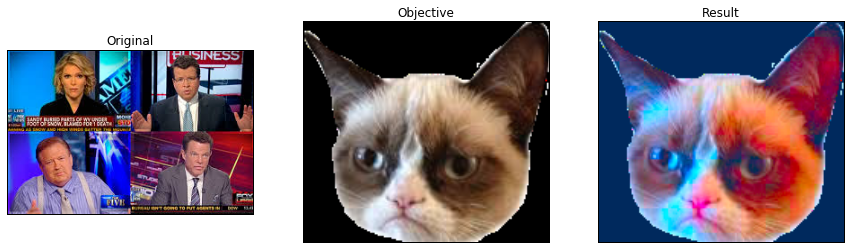

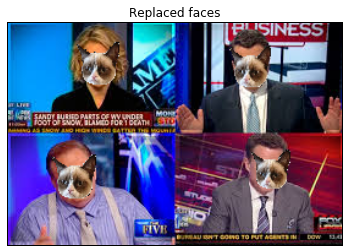

In [69]:
replace_faces('news_2.jpg', 'haarcascade_frontalface_default.xml', 1.3, 2)

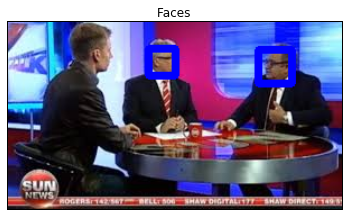

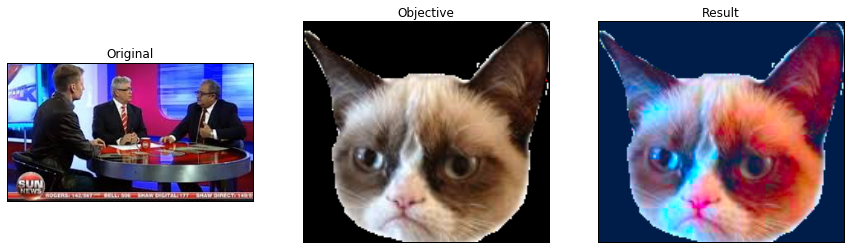

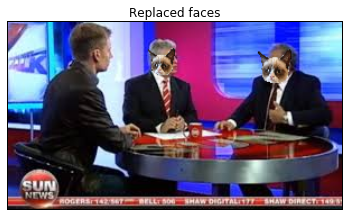

In [70]:
replace_faces('news_3.jpg', 'haarcascade_profileface.xml', 1.01, 2)